In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from polapy.competitiveness import blais_lago

In [2]:
df = pd.DataFrame([
    ("A", "I", 100),
    ("A", "II", 0),
    ("B", "I", 0),
    ("B", "II", 100),
], columns=["candidate", "polling_id", "votes"])

df["rate"] = df.groupby("polling_id", group_keys=False)["votes"].apply(lambda x: x/x.sum())
df

,candidate,polling_id,votes,rate
0,A,I,100,1.0
1,A,II,0,0.0
2,B,I,0,0.0
3,B,II,100,1.0


In [3]:
df.dtypes

candidate      object
polling_id     object
votes           int64
rate          float64
dtype: object

In [4]:
blais_lago(df, candidate="candidate", votes="votes", system="smp")

(1.0,
   candidate polling_id  votes  rate  seats  value
 0         A          I    100   1.0      0    0.0
 1         A         II      0   0.0    100    0.5
 2         B          I      0   0.0    100    0.5
 3         B         II    100   1.0      0    0.0)

In [5]:
from itertools import permutations, combinations

In [6]:
data = []

slices = 5
for i in range(1, slices + 1):
    data = data + [*np.linspace(0, 1, slices)]
len(data)

25

In [7]:
values = np.random.normal(0.25, 0.2, 10)
values = values / np.sum(values)

array([ 0.13358227,  0.29427996, -0.0411039 , -0.0003169 ,  0.31667548,
        0.09121172,  0.10388237, -0.09956383,  0.04543333,  0.1559195 ])

In [204]:
# values = np.random.normal(mu=0.5, sigma=0.01, size=10)
# values

In [193]:
n_candidates = 3
n_elections = 50
n_units = 50

output = []
for n_candidates in range(2, 10 + 1):
    print(n_candidates)
    for election_id in np.linspace(0, 1, 50):
        for unit in range(n_units):
            values = np.random.dirichlet(np.ones(n_candidates - 1), size=1)[0]
            # values = [election_id] + values *
            values = np.concatenate(([election_id], values * (1 - election_id)), axis=0)
            print(values.sum())
            dff = pd.DataFrame(values, columns=["value"])
            dff["candidate"] = list("abcdefghijklmnopqrs")[:n_candidates]
            dff["election_id"] = f"{n_candidates}_{election_id}"
            dff["unit"] = unit
            dff["n_candidates"] = n_candidates
            output.append(dff)

df = pd.concat(output, ignore_index=True)
tmp = df[df["candidate"] == "a"].groupby(["election_id", "candidate"]).agg({"value": ["std", "mean"]}).reset_index()
tmp.columns = ["election_id", "candidate", "sigma", "mu"]

df = pd.merge(df, tmp, on=["election_id", "candidate"])
df.head()

2
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0

,value,candidate,election_id,unit,n_candidates,sigma,mu
0,0.0,a,2_0.0,0,2,0.0,0.0
1,0.0,a,2_0.0,1,2,0.0,0.0
2,0.0,a,2_0.0,2,2,0.0,0.0
3,0.0,a,2_0.0,3,2,0.0,0.0
4,0.0,a,2_0.0,4,2,0.0,0.0


In [9]:
def within_p(input_df):
    weights = input_df["value"]# / input_df["value"].sum()
    vals = input_df["rate"]
    weighted_avg = np.average(vals, weights=weights)

    num = input_df["value"] * (input_df["rate"] - weighted_avg)**2

    return num.sum()

def between_p(input_df, average=0.5):
    num = input_df["value"] * (input_df["rate"] - average)**2

    return num.sum()

In [121]:
# df.groupby(["election_id", "candidate"]).apply(between_p)

In [192]:
df.head()

,value,candidate,election_id,unit,sigma,mu
0,0.0,a,2_0.0,0,0.0,0.0
1,0.0,a,2_0.0,1,0.0,0.0
2,0.0,a,2_0.0,2,0.0,0.0
3,0.0,a,2_0.0,3,0.0,0.0
4,0.0,a,2_0.0,4,0.0,0.0


In [215]:
df.groupby("candidate").apply(within_p) / df.groupby("candidate").apply(between_p)

candidate
A    0.628177
B    0.433670
dtype: float64

In [198]:
m = df.groupby(["candidate", "n_candidates"]).apply(within_p) / df.groupby(["candidate", "n_candidates"]).apply(between_p)
m = pd.DataFrame(m).reset_index().rename(columns={0: "epi"}).fillna(1).agg({"epi": "mean"}).reset_index()
m.head()

,index,0
0,epi,1.0


In [196]:
# cc.sort_values("epi").head(50)

In [199]:
cc = pd.merge(df, m, on="election_id")
cc = cc[["mu", "sigma", "epi", "election_id"]].drop_duplicates().reset_index(drop=True)
cc["mu_b"] = pd.cut(cc["mu"], bins=5).apply(lambda x: x.mid)
cc["sigma_b"] = pd.cut(cc["sigma"], bins=5).apply(lambda x: x.mid)

dd = cc.groupby(["mu_b", "sigma_b"]).agg({"epi": "mean"}).reset_index().pivot(index="mu_b", columns="sigma_b", values="epi")

KeyError: 'election_id'

<AxesSubplot: xlabel='sigma_b', ylabel='mu_b'>

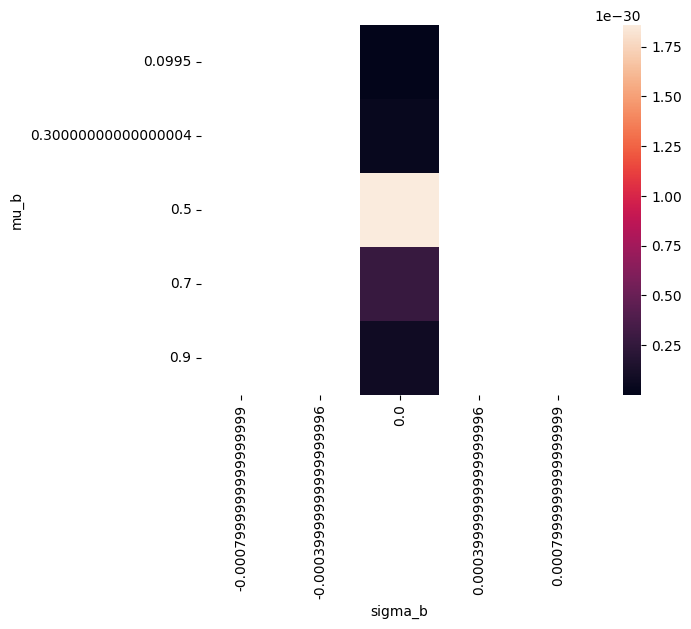

In [187]:
sns.heatmap(dd)

<AxesSubplot: xlabel='election_a', ylabel='election_b'>

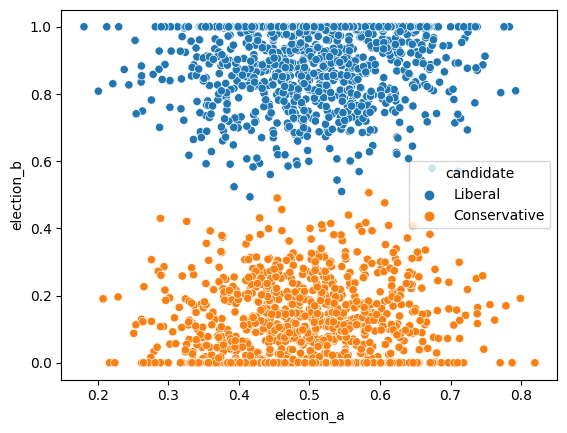

In [13]:
mu = 0.4
sigma = 0.1
output = []
for election in range(2):
    for mu1, sigma1, mu2, sigma2 in [(0.5, 0.1, 0.9, 0.15)]:
        liberal_a = np.random.normal(mu1, sigma1, 500)
        liberal_b = np.random.normal(mu2, sigma2, 500)

        liberal_a[liberal_a < 0] = 0
        liberal_a[liberal_a > 1] = 1

        liberal_b[liberal_b < 0] = 0
        liberal_b[liberal_b > 1] = 1

        tmp = pd.DataFrame(liberal_a, columns=["election_a"])
        tmp["election_b"] = liberal_b
        tmp["population"] = election
        tmp["candidate"] = "Liberal"

        output.append(tmp)

        conservative_a = 1 - liberal_a
        conservative_b = 1 - liberal_b

        tmp = pd.DataFrame(conservative_a, columns=["election_a"])
        tmp["election_b"] = conservative_b
        tmp["population"] = election
        tmp["candidate"] = "Conservative"

        output.append(tmp)

df = pd.concat(output, ignore_index=True)

sns.scatterplot(x="election_a", y="election_b", hue="candidate", data=df)

In [14]:
df.groupby("candidate").agg({
    "election_a": "std",
    "election_b": "std"
}).sum()

election_a    0.204409
election_b    0.221594
dtype: float64

In [15]:
import random

In [16]:
output = []
election_id = 1
n_size = 500
linspace = 100
for mu in np.linspace(0.01, 1, linspace):
    for sigma in np.linspace(0, 0.25, linspace):
        liberal_a = np.random.normal(mu, sigma, n_size)
        # size = np.random.randint(100, 1000)
        size = np.array([round(x * 1000, 0) for x in np.random.normal(10, 1, n_size)])

        liberal_a[liberal_a < 0] = 0
        liberal_a[liberal_a > 1] = 1

        liberal_size = [int(x) for x in np.multiply(mu, size)]

        tmp = pd.DataFrame(liberal_a, columns=["value"])
        tmp["election_id"] = election_id
        tmp["candidate"] = "Liberal"
        tmp["mu"] = mu
        tmp["sigma"] = sigma
        tmp["size"] = liberal_size

        output.append(tmp)

        conservative_a = 1 - liberal_a

        tmp = pd.DataFrame(conservative_a, columns=["value"])
        tmp["election_id"] = election_id
        tmp["candidate"] = "Conservative"
        tmp["mu"] = mu
        tmp["sigma"] = sigma
        tmp["size"] = size - liberal_size

        output.append(tmp)

        election_id += 1

df = pd.concat(output, ignore_index=True)
df["weight"] = df.groupby(["election_id", "candidate"], group_keys=False)["size"].apply(lambda x: x/x.sum()).fillna(0)

# df.sort_values("weight")
df.head()

KeyboardInterrupt: 

In [ ]:
def weighted_sd(input_df):
    weights = input_df["weight"]
    vals = input_df["value"]
    weighted_avg = np.average(vals, weights=weights) if weights.sum() > 0 else 0
    numer = np.sum(weights * (vals - weighted_avg)**2)
    denom = ((vals.count()-1)/vals.count())*np.sum(weights)
    return np.sqrt(numer/denom)

_ = "rate"
# Uses  Weighted Standard deviation of a feature to measure how divisive a location is.
# df_dv = df.groupby(["mu", "sigma"])\
#     .apply(weighted_sd)\
#     .reset_index()\
#     .rename(columns={0: "value"})

In [ ]:
# df.groupby(["mu", "sigma", "candidate"]).count()

In [ ]:
df_dv = df.groupby(["election_id", "candidate"])[["weight", "value"]].apply(weighted_sd)\
    .reset_index()\
    .rename(columns={0: "epi"})\
    .fillna(0)

df_dv = pd.merge(df_dv, df, on=["candidate", "election_id"])

df_dv.head(5)

C:\Users\cnava\AppData\Local\Temp\ipykernel_4244\2190009115.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(numer/denom)


,election_id,candidate,epi,value,mu,sigma,size,weight
0,1,Conservative,0.0,0.99,0.01,0.0,9114.0,0.001835
1,1,Conservative,0.0,0.99,0.01,0.0,10290.0,0.002072
2,1,Conservative,0.0,0.99,0.01,0.0,10618.0,0.002138
3,1,Conservative,0.0,0.99,0.01,0.0,12015.0,0.002419
4,1,Conservative,0.0,0.99,0.01,0.0,9444.0,0.001902


In [ ]:
# sns.lineplot(x="value", y="epi", hue="candidate", data=df_dv)

In [ ]:
df.groupby(["candidate", "iteration"]).agg({"value": "std"})

value
candidate    iteration          
Conservative 0          0.311373
             1          0.311373
             2          0.311373
             3          0.311373
             4          0.311373
...                          ...
Liberal      95         0.311373
             96         0.311373
             97         0.311373
             98         0.311373
             99         0.311373

[200 rows x 1 columns]

In [ ]:
df.head()

,candidate,r,size,weight
0,Liberal,0.000000,0,0.000000
1,Conservative,1.000000,866,0.162935
2,Liberal,0.052632,19,0.003546
3,Conservative,0.947368,346,0.065099
4,Liberal,0.105263,20,0.003733


In [ ]:
dd = df.groupby(["mu", "sigma", "candidate"]).agg({"value": "std"}).groupby(level=[0, 1]).apply(lambda x: x.sum()).reset_index()

In [ ]:
dd

,mu,sigma,value
0,0.0,0.000000,0.000000
1,0.0,0.013158,0.016356
2,0.0,0.026316,0.030224
3,0.0,0.039474,0.046489
4,0.0,0.052632,0.062790
...,...,...,...
395,1.0,0.197368,0.261222
396,1.0,0.210526,0.260382
397,1.0,0.223684,0.277359
398,1.0,0.236842,0.279190


In [ ]:
df_dv.groupby(["mu", "sigma"]).agg({"epi": "sum"})

epi
mu    sigma          
0.010 0.000  0.000000
      0.125  0.189796
      0.250  0.329610
0.505 0.000  0.000000
      0.125  0.475463
      0.250  1.191855
1.000 0.000  0.000000
      0.125  0.036313
      0.250  0.423586

In [ ]:
df_dv = df.groupby(["mu", "sigma", "candidate"])[["weight", "value"]].apply(weighted_sd)\
    .reset_index()\
    .rename(columns={0: "epi"})\
    .fillna(0)

C:\Users\cnava\AppData\Local\Temp\ipykernel_4244\2190009115.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(numer/denom)


In [ ]:
df_dv.groupby(["election_id", "mu", "sigma"]).agg({"epi": "sum"}).sort_values("epi")

,,,epi
election_id,mu,sigma,
1,0.01,0.000000,0.000000
5801,0.59,0.000000,0.000000
201,0.03,0.000000,0.000000
5701,0.58,0.000000,0.000000
3701,0.38,0.000000,0.000000
...,...,...,...
5300,0.53,0.250000,246.228592
4700,0.47,0.250000,246.843249
6300,0.63,0.250000,246.965376


In [ ]:
df[(df["mu"] == 0.38) & (df["sigma"] == 0.25)]

,value,election_id,candidate,mu,sigma,size,weight
3799000,0.435925,3800,Liberal,0.38,0.25,3953.0,0.002063
3799001,0.573329,3800,Liberal,0.38,0.25,4028.0,0.002102
3799002,0.480650,3800,Liberal,0.38,0.25,4264.0,0.002225
3799003,0.170498,3800,Liberal,0.38,0.25,3595.0,0.001876
3799004,0.497601,3800,Liberal,0.38,0.25,3688.0,0.001925
...,...,...,...,...,...,...,...
3799995,0.844127,3800,Conservative,0.38,0.25,6564.0,0.002099
3799996,0.477951,3800,Conservative,0.38,0.25,6854.0,0.002192
3799997,0.489424,3800,Conservative,0.38,0.25,5779.0,0.001848
3799998,0.532486,3800,Conservative,0.38,0.25,4979.0,0.001592


Text(64.74999999999999, 0.5, 'Mu')

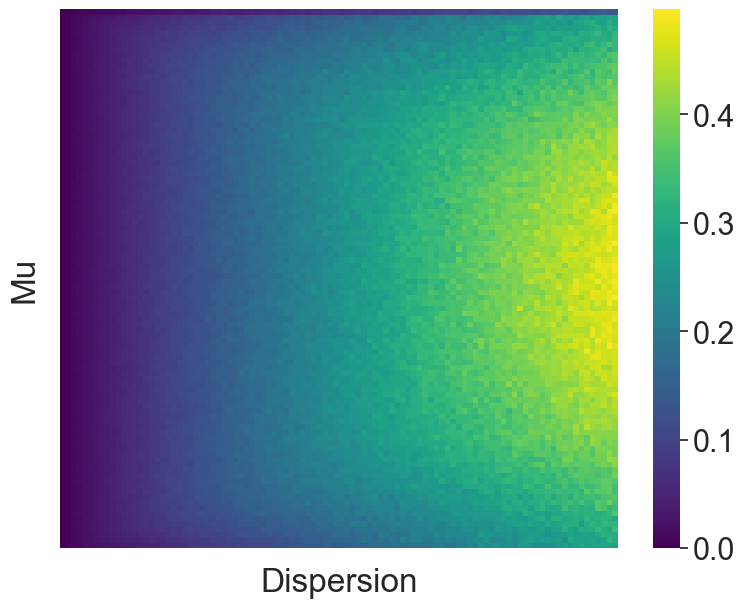

In [ ]:
sns.set(font_scale=2, style="white")
fig, ax = plt.subplots(figsize=(9, 7))
dd = df_dv.groupby(["mu", "sigma"]).agg({"epi": "sum"}).reset_index()
sns.heatmap(
    dd.pivot(index="mu", columns="sigma", values=["epi"]), cmap="viridis", ax=ax)
ax.invert_yaxis()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Dispersion")
ax.set_ylabel("Mu")